In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from tqdm import tqdm

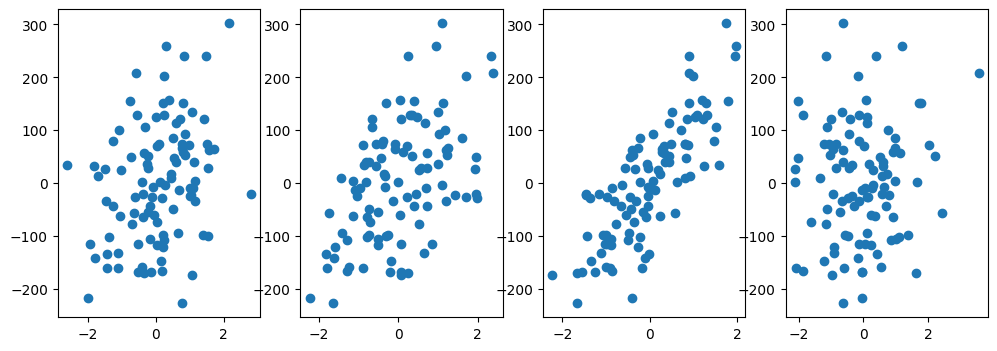

In [21]:
x , y = make_regression(n_samples = 100 , n_features = 4 , noise = 10)

plt.figure(figsize = (12 , 4))
plt.subplot(1 , 4 , 1)
plt.scatter(x[: , 0] , y)
plt.subplot(1 , 4 , 2)
plt.scatter(x[: , 1] , y)
plt.subplot(1 , 4 , 3)
plt.scatter(x[: , 2] , y)
plt.subplot(1 , 4 , 4)
plt.scatter(x[: , 3] , y)

In [22]:
print(x.shape)
print(y.shape)

(100, 4)
(100,)


In [23]:
y = y.reshape(y.shape[0] , 1)

In [24]:
#Colonnes de biais 1
x = np.hstack((x , np.ones((x.shape[0] , 1))))
x

array([[ 0.03589633,  0.2233021 ,  0.3215353 ,  0.00974094,  1.        ],
       [-0.40139079, -0.80539051,  0.62802788, -2.11931421,  1.        ],
       [-0.08354427, -0.31893059, -0.05073978,  0.63669501,  1.        ],
       [ 0.24996071, -1.27416023, -0.50052623,  0.84690961,  1.        ],
       [ 0.98923124, -0.88314427,  0.86623924,  2.01705809,  1.        ],
       [-0.16378657, -0.51346738, -0.8914292 ,  1.0090725 ,  1.        ],
       [-0.59690856,  1.70819377, -0.9884458 ,  0.14057694,  1.        ],
       [-1.24906235, -0.38029164,  1.47617243, -0.12951155,  1.        ],
       [-1.42871507, -1.81870135, -0.00825106,  0.41279584,  1.        ],
       [ 0.1744219 , -1.28670015, -0.87284961, -1.88013177,  1.        ],
       [ 1.02552277,  0.70654317, -0.87042672,  0.2646592 ,  1.        ],
       [-0.12403881,  0.06659368, -1.54761401, -0.03103137,  1.        ],
       [ 0.65661138, -1.40728143, -0.48012222,  0.10585933,  1.        ],
       [ 0.99817472, -1.04221944, -0.0

In [25]:
theta = np.random.randn(x.shape[1] , 1)
theta.shape

(5, 1)

In [26]:
#Model
def model(x , theta):
    return x.dot(theta)

In [27]:
model(x , theta)

array([[ 9.76658646e-01],
       [-4.18613207e-01],
       [ 1.56668004e+00],
       [ 1.81645332e+00],
       [ 4.56079400e+00],
       [ 1.07480768e+00],
       [-1.36622480e+00],
       [ 2.67482043e+00],
       [ 2.34457283e+00],
       [-1.73450528e+00],
       [-5.48164563e-01],
       [-1.27431740e+00],
       [ 1.05978757e+00],
       [ 8.53872578e-01],
       [ 9.17798248e-01],
       [ 1.09741483e+00],
       [-1.08871402e+00],
       [-2.03710146e+00],
       [ 3.58590575e+00],
       [-4.24359580e-01],
       [ 3.65276804e-01],
       [ 7.98258135e-01],
       [ 5.55667107e-01],
       [-5.09799391e-01],
       [ 2.32394199e+00],
       [ 1.26341293e+00],
       [ 1.45389378e+00],
       [ 5.28034344e+00],
       [ 1.41180313e+00],
       [ 1.66902139e-01],
       [ 3.90429338e+00],
       [ 2.91824989e-01],
       [ 1.95695874e+00],
       [-8.12136099e-01],
       [ 2.03036551e+00],
       [-9.80324711e-02],
       [ 1.72022524e+00],
       [ 1.55082029e+00],
       [-3.8

In [28]:
#Fonction cout
def cost_function(x , y , theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(x , theta) - y)**2)

In [29]:
cost_function(x , y , theta)

6104.689206658272

In [30]:
#Gradient
def gradient(x , y , theta):
    m = len(y)
    return 1 / m * x.T.dot(model(x, theta) - y)

In [32]:
gradient(x , y , theta)

array([[-34.76513242],
       [-58.56413385],
       [-80.46584519],
       [ -9.8855696 ],
       [ -1.75922712]])

In [37]:
#Descente de gradient
def gradient_descente(x , y , theta , learning_rate , n_iter):

    #Courbe d'apprentissage
    cost_history = np.zeros(n_iter)
    
    for i in tqdm(range(n_iter)):
        theta = theta - learning_rate * gradient(x , y , theta)
        cost_history[i] = cost_function(x , y , theta)
    return theta , cost_history

In [41]:
theta , cost_history = gradient_descente(x , y , theta , learning_rate = 0.01 , n_iter = 1000)

100%|██████████| 1000/1000 [00:00<00:00, 15334.93it/s]


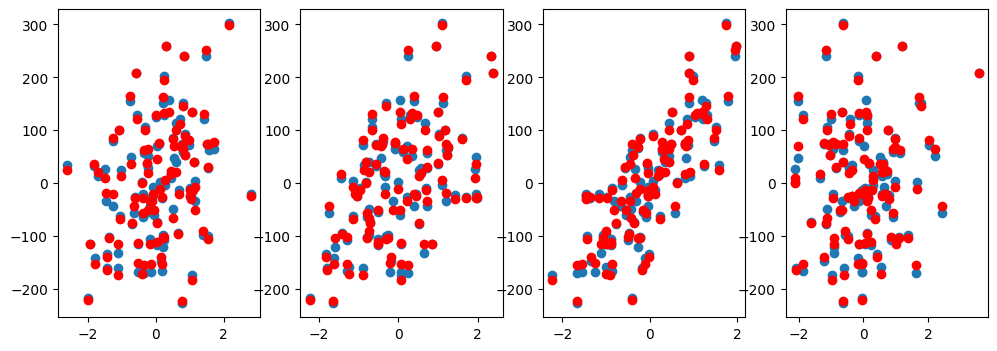

In [42]:
#Predicition
pred = model(x , theta)

plt.figure(figsize = (12 , 4))

#Variable 1 
plt.subplot(1 , 4 , 1)
plt.scatter(x[: , 0] , y)
plt.scatter(x[: , 0] , pred , c = 'r') 

#Variable 2 
plt.subplot(1 , 4 , 2)
plt.scatter(x[: , 1] , y)
plt.scatter(x[: , 1] , pred , c = 'r') 

#Variable 3 
plt.subplot(1 , 4 , 3)
plt.scatter(x[: , 2] , y)
plt.scatter(x[: , 2] , pred , c = 'r') 

#Variable 4 
plt.subplot(1 , 4 , 4)
plt.scatter(x[: , 3] , y)
plt.scatter(x[: , 3] , pred , c = 'r') 

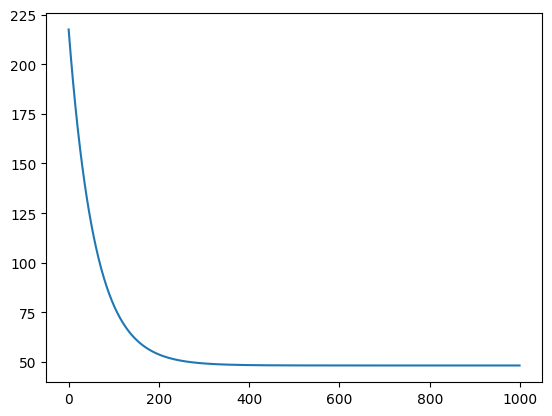

In [43]:
plt.plot(range(1000) , cost_history)

In [44]:
#Coefficient de determination(Performance du modèle)
def coeff(y , pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u / v)

In [45]:
coeff(y , pred)

0.9921969837588354